Профессия Data Science
Блок 1. Знакомство с данными. Python для анализа данных
PYTHON-14. Очистка данных
9/12   8. Закрепление знаний

Вам предоставлен набор данных, первоначально полученный в Национальном институте диабета, болезней органов пищеварения и почек. 
Этот набор данных создан для того, чтобы на основе определённых диагностических измерений предсказать, есть ли у пациента диабет. 
На выбор этих экземпляров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года индейского происхождения Пима.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


Pregnancies — количество беременностей.

Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.

BloodPressure — диастолическое артериальное давление (мм рт. ст.).

SkinThickness — толщина кожной складки трицепса (мм).

Insulin — двухчасовой сывороточный инсулин (ме Ед/мл).

BMI — индекс массы тела (
в
е
с
в
к
г
р
о
с
т
в
м
).

DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).

Age — возраст.

Outcome — наличие диабета (0 — нет, 1 — да).

"""Задание 8.1      
Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их.
Для поиска используйте все признаки в данных. Сколько записей осталось в данных?"""

In [6]:
dupl_columns = list(diabetes.columns)

mask = diabetes.duplicated(subset=dupl_columns)
diabetes_duplicates = diabetes[mask]
print(f'Число найденных дубликатов: {diabetes_duplicates.shape[0]}')

Число найденных дубликатов: 10


In [9]:
diabetes_dedupped = diabetes.drop_duplicates(subset = dupl_columns)
print(f'Результирующее число записей: {diabetes_dedupped.shape[0]}')

Результирующее число записей: 768


In [13]:
diabetes_dedupped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Gender                    768 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 66.0+ KB


In [31]:
"""Задание 8.2
Далее найдите все неинформативные признаки в данных и избавьтесь от них.
В качестве порога информативности возьмите 0.95: удалите все признаки, для которых 95 %
значений повторяются или 95 % записей уникальны. В ответ запишите имена признаков,
которые вы нашли (без кавычек)."""

#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in diabetes_dedupped.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes_dedupped[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes_dedupped[col].nunique() / diabetes_dedupped[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

Gender: 100.0% одинаковых значений


In [20]:
print(information_diabetes)
information_diabetes = diabetes_dedupped.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {information_diabetes.shape[1]}')

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6       98             58             33      190  34.0   
1              2      112             75             32        0  35.7   
2              2      108             64              0        0  30.8   
3              8      107             80              0        0  24.6   
4              7      136             90              0        0  29.9   
..           ...      ...            ...            ...      ...   ...   
763            5      139             64             35      140  28.6   
764            1       96            122              0        0  22.4   
765           10      101             86             37        0  45.6   
766            0      141              0              0        0  42.4   
767            0      125             96              0        0  22.5   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.430   43        0  
1                  

In [28]:
information_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 60.0 KB


In [27]:
"""Задание 8.3 
Попробуйте найти пропуски в данных с помощью метода isnull().
Спойлер: ничего не найдёте. А они есть! Просто они скрыты от наших глаз.
 В таблице пропуски в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI обозначены нулём, 
 поэтому традиционные методы поиска пропусков ничего вам не покажут. Давайте это исправим!
Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI
 на символ пропуска. Его вы можете взять из библиотеки numpy: np.nan.
Какая доля пропусков содержится в столбце Insulin? Ответ округлите до сотых."""

# Заменяем 0 на NaN в указанных столбцах
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
information_diabetes[columns_to_replace] = diabetes_dedupped[columns_to_replace].replace(0, np.nan)

# Рассчитываем долю пропусков в столбце Insulin
insulin_missing_percentage = information_diabetes['Insulin'].isna().mean()

print(f"Доля пропусков в столбце Insulin: {insulin_missing_percentage:.2%}")

Доля пропусков в столбце Insulin: 48.70%


In [29]:
def replace_zeros_with_nan(value):
    return np.nan if value == 0 else value

columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_to_replace:
    information_diabetes[column] = information_diabetes[column].apply(replace_zeros_with_nan)

insulin_missing_ratio = information_diabetes['Insulin'].isnull().mean()
print(f"Доля пропусков в столбце Insulin: {insulin_missing_ratio:.2%}")


Доля пропусков в столбце Insulin: 48.70%


In [36]:
"""Задание 8.4      
Удалите из данных признаки, где число пропусков составляет более 30 %. \
Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?
"""
threshold = len(information_diabetes) * 0.7  # 70% порог
df_cleaned = information_diabetes.dropna(thresh=threshold, axis=1)

remaining_columns = df_cleaned.shape[1]
print(f"Осталось {remaining_columns} признаков после удаления тех, где более 30% пропусков.")

Осталось 8 признаков после удаления тех, где более 30% пропусков.


In [39]:
"""Задание 8.5
Удалите из данных только те строки, в которых содержится более двух пропусков одновременно.
Чему равно результирующее число записей в таблице?"""

df_cleaned_rows = df_cleaned.dropna(thresh=df_cleaned.shape[1] - 2)

remaining_rows = df_cleaned_rows.shape[0]
print(f"Осталось {remaining_rows} записей после удаления тех, где более двух пропусков.")

Осталось 761 записей после удаления тех, где более двух пропусков.


In [40]:
"""Задание 8.6
В оставшихся записях замените пропуски на медиану. ему равно среднее значение в столбце SkinThickness?
Ответ округлите до десятых."""

# Замена пропусков на медиану в оставшихся записях
df_cleaned_rows_filled = df_cleaned_rows.fillna(df_cleaned_rows.median())

# Рассчитываем среднее значение в столбце SkinThickness
mean_skin_thickness = df_cleaned_rows_filled['SkinThickness'].mean()

print(f"Среднее значение в столбце SkinThickness после замены пропусков на медиану: {mean_skin_thickness}")


Среднее значение в столбце SkinThickness после замены пропусков на медиану: 29.109067017082786


In [42]:
"""Задание 8.7

Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?
"""
# Вычисляем Q1 и Q3
Q1 = df_cleaned_rows_filled['SkinThickness'].quantile(0.25)
Q3 = df_cleaned_rows_filled['SkinThickness'].quantile(0.75)

# Вычисляем IQR
IQR = Q3 - Q1

# Вычисляем верхнюю и нижнюю границы
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Выявляем выбросы
outliers = df_cleaned_rows_filled[(df_cleaned_rows_filled['SkinThickness'] < lower_bound) | (df_cleaned_rows_filled['SkinThickness'] > upper_bound)]

# Выводим количество выбросов
print(f"Количество выбросов в признаке SkinThickness: {len(outliers)}")


Количество выбросов в признаке SkinThickness: 87


In [80]:
"""Задание 8.8
Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?"""

import numpy as np

# Вычисляем среднее и стандартное отклонение
mean_skin_thickness = df_cleaned_rows_filled['SkinThickness'].mean()
std_skin_thickness = df_cleaned_rows_filled['SkinThickness'].std()

# Задаем порог z-отклонения (обычно используется 3, но можно выбрать другое значение)
threshold = 3

# Вычисляем верхнюю и нижнюю границы
lower_bound = mean_skin_thickness - threshold * std_skin_thickness
upper_bound = mean_skin_thickness + threshold * std_skin_thickness

# Выявляем выбросы
outliers_z_score = df_cleaned_rows_filled[(df_cleaned_rows_filled['SkinThickness'] < lower_bound) 
                                          | (df_cleaned_rows_filled['SkinThickness'] > upper_bound)]

# Выводим количество выбросов
print(f"Количество выбросов в признаке SkinThickness по z-отклонению: {len(outliers_z_score)}")


Количество выбросов в признаке SkinThickness по z-отклонению: 4


Задание 8.9  

"""Задание 8.9      
На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction.
Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании признака.
Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода
межквартильного размаха.

Затем найдите число выбросов в этом же признаке в логарифмическом масштабе
(при логарифмировании единицу прибавлять не нужно!). Какова разница между двумя этими числами
(вычтите из первого второе)?"""

In [67]:
"""колько выбросов найдёт классический метод межквартильного размаха в признаке DiabetesPedigreeFunction?
"""
# Вычисляем Q1 и Q3
Q1 = df_cleaned_rows_filled['DiabetesPedigreeFunction'].quantile(0.25)
Q3 = df_cleaned_rows_filled['DiabetesPedigreeFunction'].quantile(0.75)

# Вычисляем IQR
IQR = Q3 - Q1

# Вычисляем верхнюю и нижнюю границы
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Выявляем выбросы
outliers = df_cleaned_rows_filled[(df_cleaned_rows_filled['DiabetesPedigreeFunction'] < lower_bound) 
                                  | (df_cleaned_rows_filled['DiabetesPedigreeFunction'] > upper_bound)]

# Выводим количество выбросов
print(f"Количество выбросов в признаке DiabetesPedigreeFunction: {len(outliers)}")

Количество выбросов в признаке DiabetesPedigreeFunction: 29


In [66]:
# Вычисляем межквартильный размах
Q1 = df_cleaned_rows_filled['DiabetesPedigreeFunction'].quantile(0.25)
Q3 = df_cleaned_rows_filled['DiabetesPedigreeFunction'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выявления выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим выбросы
outliers_iqr = df_cleaned_rows_filled[(df_cleaned_rows_filled['DiabetesPedigreeFunction'] < lower_bound)
                                      | (df_cleaned_rows_filled['DiabetesPedigreeFunction'] > upper_bound)]

# Выводим количество выбросов
print(f"Количество выбросов в признаке DiabetesPedigreeFunction по межквартильному размаху: {len(outliers_iqr)}")

Количество выбросов в признаке DiabetesPedigreeFunction по межквартильному размаху: 29


In [84]:
df_cleaned_rows_filled['DiabetesPedigreeFunction_log'] = np.log(df_cleaned_rows_filled['DiabetesPedigreeFunction'])

# Вычисляем межквартильный размах
Q1 = df_cleaned_rows_filled['DiabetesPedigreeFunction_log'].quantile(0.25)
Q3 = df_cleaned_rows_filled['DiabetesPedigreeFunction_log'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выявления выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим выбросы
outliers_iqr = df_cleaned_rows_filled[(df_cleaned_rows_filled['DiabetesPedigreeFunction_log'] < lower_bound)
                                      | (df_cleaned_rows_filled['DiabetesPedigreeFunction_log'] > upper_bound)]

# Выводим количество выбросов
print(f"Количество выбросов в признаке DiabetesPedigreeFunction_log по межквартильному размаху: {len(outliers_iqr)}")


Количество выбросов в признаке DiabetesPedigreeFunction_log по межквартильному размаху: 0


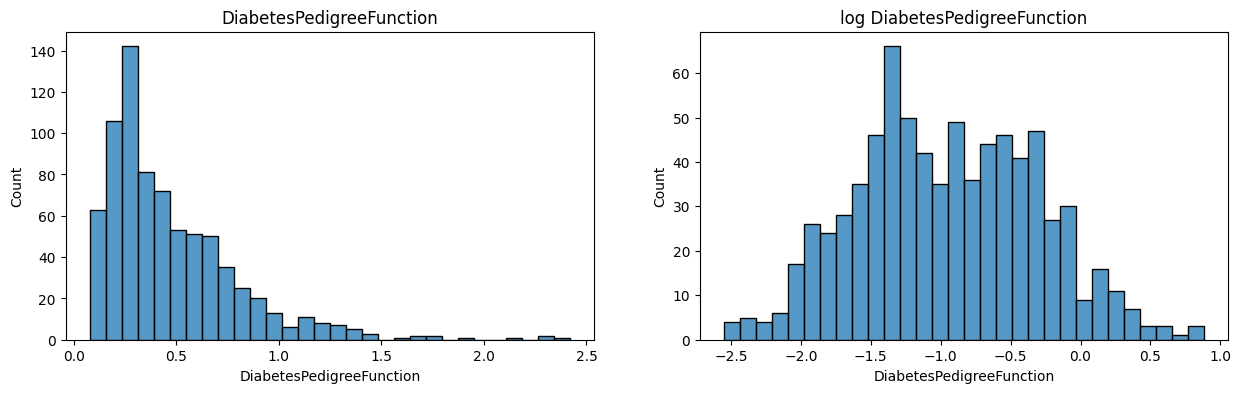

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(df_cleaned_rows_filled["DiabetesPedigreeFunction"], bins=30, ax=axes[0])
histplot.set_title(column);

#гистограмма в логарифмическом масштабе
log_= np.log(df_cleaned_rows_filled["DiabetesPedigreeFunction"])
histplot = sns.histplot(log_ , bins=30, ax=axes[1])
histplot.set_title("log "+ "DiabetesPedigreeFunction");

In [72]:
"""Теперь, чтобы найти количество выбросов в логарифмическом масштабе, вы
 можете использовать следующий код:"""
# Применяем логарифмирование
df_cleaned_rows_filled['DiabetesPedigreeFunction_log'] = np.log1p(df_cleaned_rows_filled['DiabetesPedigreeFunction'])

# Вычисляем межквартильный размах для логарифмированного признака
Q1_log = df_cleaned_rows_filled['DiabetesPedigreeFunction_log'].quantile(0.25)
Q3_log = df_cleaned_rows_filled['DiabetesPedigreeFunction_log'].quantile(0.75)
IQR_log = Q3_log - Q1_log

# Определяем границы для выявления выбросов в логарифмическом масштабе
lower_bound_log = Q1_log - 1.5 * IQR_log
upper_bound_log = Q3_log + 1.5 * IQR_log

# Находим выбросы в логарифмическом масштабе
outliers_iqr_log = df_cleaned_rows_filled[
    (df_cleaned_rows_filled['DiabetesPedigreeFunction_log'] < lower_bound_log) |
    (df_cleaned_rows_filled['DiabetesPedigreeFunction_log'] > upper_bound_log)
]

# Выводим количество выбросов в логарифмическом масштабе
print(f"Количество выбросов в признаке DiabetesPedigreeFunction в логарифмическом масштабе: {len(outliers_iqr_log)}")


"""Разницу между двумя числами можно найти вычитанием из первого второго:"""
difference = len(outliers_iqr) - len(outliers_iqr_log)
print(f"Разница между выбросами в логарифмическом масштабе и обычном: {difference}")



Количество выбросов в признаке DiabetesPedigreeFunction в логарифмическом масштабе: 12
Разница между выбросами в логарифмическом масштабе и обычном: 17


In [56]:
l=3
r=3
data = df_cleaned_rows_filled
column = 'DiabetesPedigreeFunction'

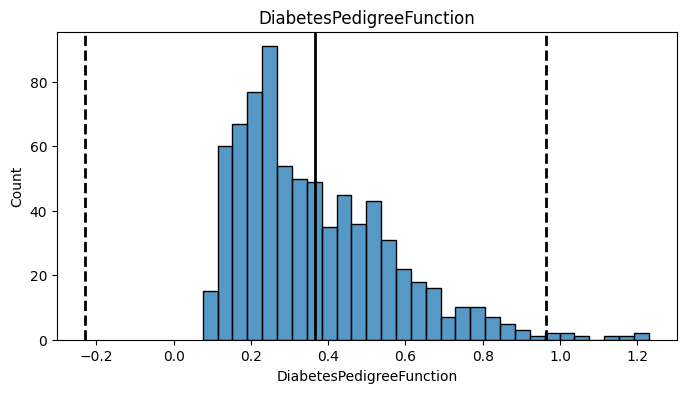

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_data = np.log(data[column] + 1)
histplot = sns.histplot(log_data, bins=30, ax=ax)
histplot.axvline(log_data.mean(), color='k', lw=2)
histplot.axvline(log_data.mean()+ 3 * log_data.std(), color='k', ls='--', lw=2)
histplot.axvline(log_data.mean()- 3 * log_data.std(), color='k', ls='--', lw=2)
histplot.set_title(column);

Число выбросов по методу z-отклонения: 9
Результирующее число записей: 752
[1.699 2.329 1.731 2.42  1.893 1.698 2.137 2.288 1.781]


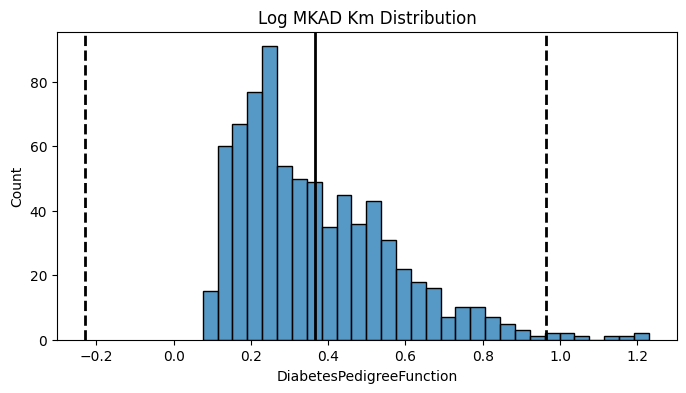

In [79]:
#Задание 8.9

def def_outliers_bar_chart(data, feature, log_scale=True, left = 3, right = 3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

#Применим эту функцию к таблице sber_data и признаку mkad_km, а также выведем размерности результатов:
outliers, cleaned = def_outliers_bar_chart(data, column, log_scale=True, left = l,  right = r)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
print(outliers[column].unique())

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_mkad_km = np.log(data[column] + 1)
histplot = sns.histplot(log_mkad_km, bins=30, ax=ax)
histplot.axvline(log_mkad_km.mean(), color='k', lw=2)
histplot.axvline(log_mkad_km.mean()+ r * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.axvline(log_mkad_km.mean()- l * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.set_title('Log MKAD Km Distribution');
